In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.simplefilter("ignore")

In [2]:
# organ="liver"
# organ="heart"
organ="kidney"
# organ="muscle"

In [3]:
path=f"data/{organ}/" 
filelist=os.listdir(path) 
data=pd.DataFrame()

In [4]:
for  p in filelist[0:]: 
    temp=pd.read_csv(path+p)
    data=pd.concat([data,temp])

# filelist

Text(0, 0.5, 'Mass error (ppm), Labeled sample')

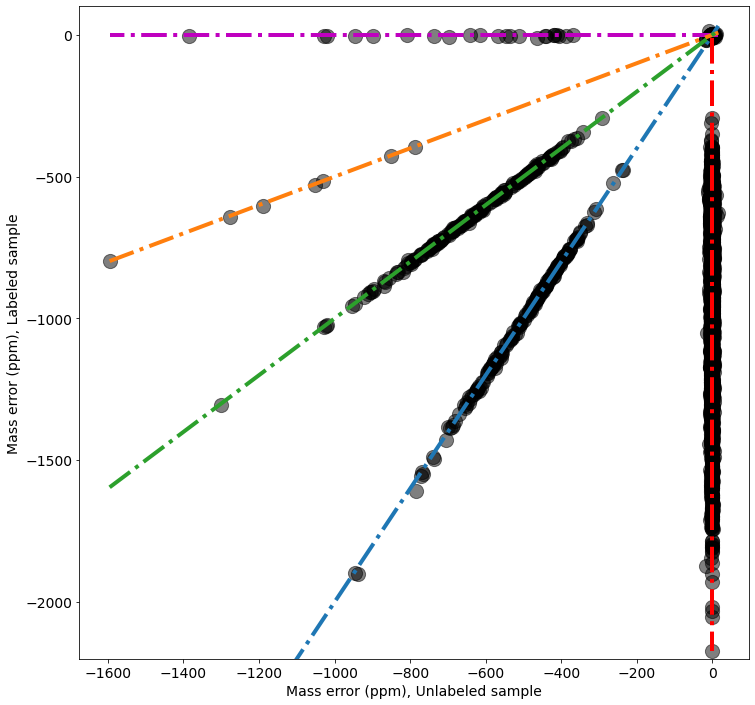

In [5]:
plt.rc('font', size=14) 
plt.figure(figsize=(12,12))
x=np.arange(data.t0_error.min(),data.t0_error.max())

plt.scatter(data.t0_error,data.t31_error,c='k',marker='o',alpha=0.5,s=200)
plt.vlines(x=0,ymin=-data.t31_error.max(),ymax=data.t31_error.min(),color='red',linestyle="-.",linewidth=4)
plt.hlines(y=0,xmin=data.t0_error.max(),xmax=data.t0_error.min(),color='m',linestyle="-.",linewidth=4)

plt.plot(x,2*x,linestyle="-.",linewidth=4)
plt.plot(x,0.5*x,linestyle="-.",linewidth=4) 
plt.plot(x,x,linestyle="-.",linewidth=4) 
plt.ylim([-2200,100])

plt.xlabel("Mass error (ppm), Unlabeled sample")
plt.ylabel("Mass error (ppm), Labeled sample")

# plt.savefig(f"Error Plot_{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [6]:
tempdata=data[data.t31_error!=0]
tempdata["diff"]=abs((tempdata.t0_error - tempdata.t31_error)/tempdata.t31_error)
tempdata[(tempdata.t0_error<-200) & ((tempdata.t31_error<-200))].sort_values(by="diff",ascending=True).head(15)

,Protein,peptied,charge,t0_error,t31_error,diff
5,CISY_MOUSE,TVVGQITVDMMYGGMR,2,-572.1,-572.1,0.0
4,DPEP1_MOUSE,VASLIGVEGGHLIDSSLGVLR,4,-479.6,-479.6,0.0
23,SPTB2_MOUSE,EAEKLESEHPDQAQAILSR,3,-467.6,-467.6,0.0
5,HOT_MOUSE,FLFDLNVDDGLAALGYSK,2,-1029.2,-1029.1,0.000097
0,KAP2_MOUSE,MFESFIESVPLFK,2,-639.4,-639.5,0.000156
7,VWA8_MOUSE,NGFFVDFFDIFPR,2,-621.0,-621.1,0.000161
0,B2L13_MOUSE,AEGAAQLSEER,2,-868.8,-868.6,0.00023
3,DHRS4_MOUSE,FPSLGPYNVSK,2,-835.2,-835.5,0.000359
1,VATL_MOUSE,NPEYSSFFGVMGASSAMVFSAMGAAYGTAK,3,-663.2,-663.6,0.000603
1,KNG1_MOUSE,TDGSPTFYSFK,2,-805.4,-805.9,0.00062


In [7]:
print("t31 \u2245 0 t0> 0,\t",100*tempdata[ (abs(tempdata.t31_error)< 100) & (abs(tempdata.t0_error) >100)].shape[0]/tempdata.shape[0]) #t31=0
print("t0  \u2245 0 t31 >0,\t",100*tempdata[ (abs(tempdata.t0_error)<100) & (abs(tempdata.t31_error) > 100)].shape[0]/tempdata.shape[0]) # t0=0
print("t0  \u2245 0 t31 \u2245 0,\t",100*tempdata[(abs(tempdata.t31_error) < 100) & (abs(tempdata.t0_error) < 100)].shape[0]/tempdata.shape[0]) # t0=0 and t31=0
print("t0 \u2245 0.5*t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&(tempdata["diff"]<0.65) & (tempdata["diff"]>0.45)].shape[0]/tempdata.shape[0]) # t0 = 0.5*t31
print("t0 \u2245 t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&  (tempdata["diff"]<0.15)].shape[0]/tempdata.shape[0]) # t0 = t31
print("t0 \u2245 2*t31,\t",100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)& (tempdata["diff"]>0.95)].shape[0]/tempdata.shape[0]) # t0 = 2*t31

t31 ≅ 0 t0> 0,	 0.4448742746615087
t0  ≅ 0 t31 >0,	 81.91489361702128
t0  ≅ 0 t31 ≅ 0,	 10.831721470019342
t0 ≅ 0.5*t31,	 3.249516441005803
t0 ≅ t31,	 3.4235976789168276
t0 ≅ 2*t31,	 0.13539651837524178


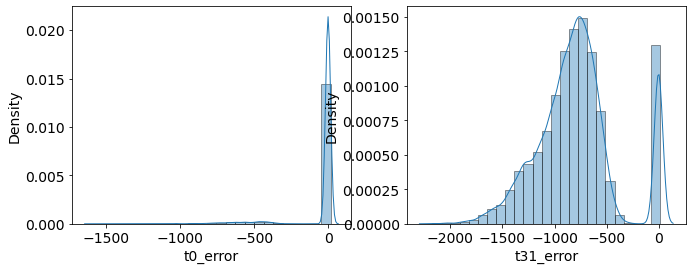

<AxesSubplot:xlabel='t31_error', ylabel='Density'>

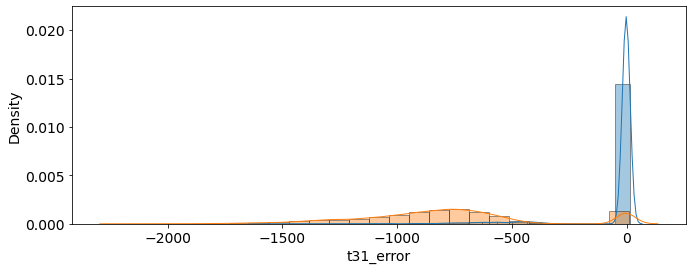

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.distplot(data.t0_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.subplot(1,2,2) 
sns.distplot(data.t31_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.show()

# =======================================================
# =======================================================
# =======================================================

plt.figure(figsize=(11,4))
 
sns.distplot(data.t0_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")
 
sns.distplot(data.t31_error.astype(float), 
             hist=True, kde=True, bins=25, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

Text(0, 0.5, 'Mass error (ppm), Labeled sample')

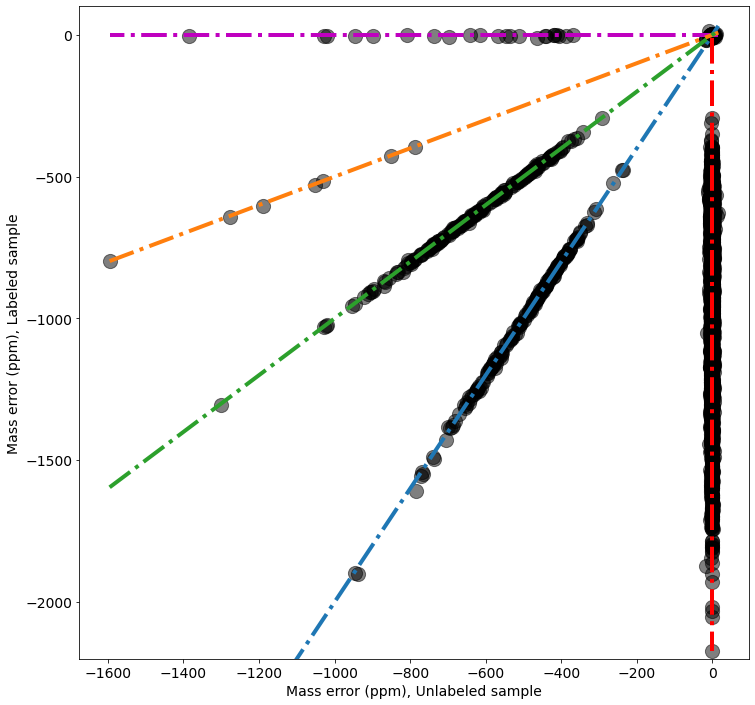

In [9]:
plt.rc('font', size=14) 
plt.figure(figsize=(12,12))
x=np.arange(data.t0_error.min(),data.t0_error.max())

plt.scatter(data.t0_error,data.t31_error,c='k',marker='o',alpha=0.5,s=200)
plt.vlines(x=0,ymin=-data.t31_error.max(),ymax=data.t31_error.min(),color='red',linestyle="-.",linewidth=4)
plt.hlines(y=0,xmin=data.t0_error.max(),xmax=data.t0_error.min(),color='m',linestyle="-.",linewidth=4)

plt.plot(x,2*x,linestyle="-.",linewidth=4)
plt.plot(x,0.5*x,linestyle="-.",linewidth=4) 
plt.plot(x,x,linestyle="-.",linewidth=4) 
plt.ylim([-2200,100])

plt.xlabel("Mass error (ppm), Unlabeled sample")
plt.ylabel("Mass error (ppm), Labeled sample")

# plt.savefig(f"Error Plot_{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [10]:
# plt.bar([0,1,2,3,4],[6,84,5.6,4,0.6],color=['r','b','g','orange','m'])

In [11]:

# df=pd.DataFrame()
# df["x"]=[10.27]
# df["y"]=[10.08]
# df["z"]=[14]
# df["u"]=[15.6]
# df["w"]=[100] 

# (df).plot(kind='bar', 
#                     stacked=True, 
#                     colormap='tab10', 
#                     figsize=(0.5, 12),legend =False,color=['r','b','g','orange','m'][::-1])

# # plt.legend(loc="upper left", ncol=2)
# # plt.legend()
# plt.box()
# plt.xticks([])
# plt.yticks([]) 


# sumval=0
# for proportion in df.loc[0]:
#     sumval=sumval+proportion-4
#     plt.text(x=0.3,
#              y=sumval-1,
#              s=f'{np.round(proportion-10 , 3)}%', 
#              color="k",fontweight='bold',
#              fontsize=12)
    
# plt.savefig(f"Error Plot_{organ}_sidePlot.jpeg",dpi=900, bbox_inches = "tight")
# plt.show()


In [12]:
# color=['r','b','g','orange','m'][::-1]
# df=pd.DataFrame()
# df["x"]=[10.27]
# df["y"]=[10.08]
# df["z"]=[14]
# df["u"]=[15.6]
# df["w"]=[100] 

# df2=df-10
# df2["x"]=1
# df2["y"]=1

# (df2).plot(kind='bar', 
#                     stacked=True, 
#                     colormap='tab10', 
#                     figsize=(0.5, 13),legend =False,color=color)

# # plt.legend(loc="upper left", ncol=2)
# # plt.legend()
# plt.box()
# plt.xticks([])
# plt.yticks([]) 


# sumval=0
# for index, proportion in enumerate(df2.loc[0]):
#     sumval=sumval+proportion
#     if index == 0:
#         plt.text(x=0.3,
#              y=sumval-1,
#              s=f'{np.round(0.27 , 3)}%', 
#              color=color[index],#fontweight='bold',
#              fontsize=12)
#     elif index == 1:
#         plt.text(x=0.3,
#              y=sumval,
#              s=f'{np.round(0.08 , 3)}%', 
#              color=color[index],#fontweight='bold',
#              fontsize=12)
#     else:
#         plt.text(x=0.3,
#              y=sumval-2,
#              s=f'{np.round(proportion , 3)}%', 
#              color=color[index],#fontweight='bold',
#              fontsize=12)
    
# plt.savefig(f"Error Plot_{organ}_sidePlot.jpeg",dpi=900, bbox_inches = "tight")
# plt.show()


In [13]:
f=100*tempdata[ (abs(tempdata.t31_error)< 100) & (abs(tempdata.t0_error) >100)].shape[0]/tempdata.shape[0] #t31=0
a=100*tempdata[(abs(tempdata.t31_error) < 100) & (abs(tempdata.t0_error) < 100)].shape[0]/tempdata.shape[0] # t0=0 and t31=0
b=100*tempdata[ (abs(tempdata.t0_error)<100) & (abs(tempdata.t31_error) > 100)].shape[0]/tempdata.shape[0] # t0=0 , t31 >0
c=100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&(tempdata["diff"]<0.65) & (tempdata["diff"]>0.45)].shape[0]/tempdata.shape[0] # t0 = 0.5*t31
d=100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)&  (tempdata["diff"]<0.15)].shape[0]/tempdata.shape[0] # t0 = t31
e=100*tempdata[(abs(tempdata.t31_error) >= 100) & (abs(tempdata.t0_error) >= 100)& (tempdata["diff"]>0.95)].shape[0]/tempdata.shape[0] # t0 = 2*t31
print(a,b,c,d,e,f)
print((a+b+c+d+e+f))

10.831721470019342 81.91489361702128 3.249516441005803 3.4235976789168276 0.13539651837524178 0.4448742746615087
100.00000000000003


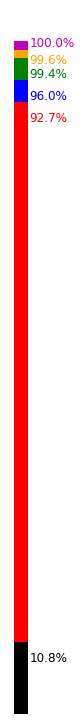

In [14]:
color=['k','r','b','g','orange','m']
df=pd.DataFrame()
df["a"]=[a+10]
df["b"]=[b+10]
df["c"]=[c+10]
df["d"]=[d+10]
df["e"]=[e+10]
df["f"]=[f+10]

df2=df-10
df2["e"]=df2["e"]+1
df2["f"]=df2["f"]+1

(df2).plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(0.5, 13),legend =False,color=color)

# plt.legend(loc="upper left", ncol=2)
# plt.legend()
plt.box()
plt.xticks([])
plt.yticks([]) 


sumval=0
for index, proportion in enumerate(df2.loc[0]):
    sumval=sumval+proportion
    if index == 4:
        plt.text(x=0.3,
             y=sumval-2,
             s=f'{np.round(sumval-1 , 1)}%', 
             color=color[index],#fontweight='bold',
             fontsize=12)
    elif index == 5:
        plt.text(x=0.3,
             y=sumval-1,
             s=f'{np.round(sumval-2 , 1)}%', 
             color=color[index],#fontweight='bold',
             fontsize=12)
    else:
        plt.text(x=0.3,
             y=sumval-3,
#              s=f'{np.round(proportion , 3)}%', 
             s=f'{np.round(sumval , 1)}%', 
             color=color[index],#fontweight='bold',
             fontsize=12)
    
plt.savefig(f"Error Plot_{organ}_sidePlot.jpeg",dpi=900, bbox_inches = "tight")
plt.show()
